# Визуализация массивов numpy

## Изображения как массивы
В компьютерной графике используется так называемое "растровое" представление изображения, которое представляет собой не что иное как матрицу "пикселей", каждый элемент которой является числовым кодом цвета. Массив numpy, имеющий подходящие размеры и подходящий тип данных, может быть визуализирован непосредственно как растровое изображение. Посмотрим простой пример.

In [1]:
import numpy as np
gradient = np.tile(np.arange(0, 256, dtype='uint8'), (255, 1))
gradient

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]], dtype=uint8)

Стоит обратить внимание на тип данных - uint8. Это целое беззнаковое 8-битное число. Проще говоря, просто 1 байт. Именно такой тип используется для кодирования цвета (хотя библиотека matplotlib позволяет визуализировать массивы с любыми типами данных, но для некоторых других целей стоит использовать тип uint8). О функции `np.tile` почитайте подробнее в документации.

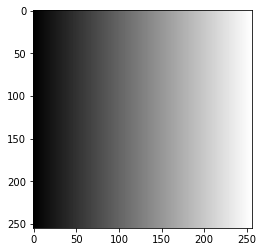

In [2]:
import matplotlib.pyplot as plt
plt.imshow(gradient, cmap='gray', vmin=0, vmax=255)
plt.show()

Визуализация массива в matplotlib выполняется с помощью функции imshow. Аргументы `cmap='gray', vmin=0, vmax=255` говорят о том, что должны использоваться оттенки серого со значениями от 0 (черный) до 255 (белый).

**Упраженение №1**

Попробуйте поэкспериментировать с этими параметрами. Посмотреть встроенные цветовые схемы matplotlib можно здесь: https://matplotlib.org/stable/tutorials/colors/colormaps.html

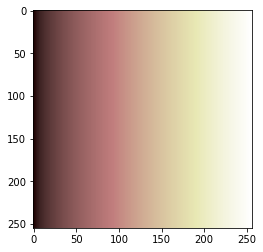

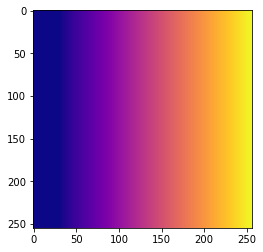

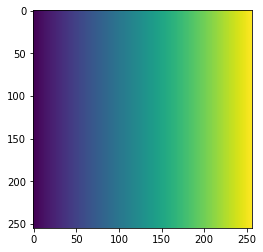

In [49]:
import matplotlib.pyplot as plt
plt.imshow(gradient, cmap='pink', vmin=0, vmax=255)
plt.show()
plt.imshow(gradient, cmap='plasma', vmin=30, vmax=255)
plt.show()
plt.imshow(gradient, cmap='viridis', vmin=0, vmax=255)
plt.show()

## Загрузка растрового изображения в массив
Воспользовавшись библиотекой pillow можно загрузить в массив растровое изображение.

In [5]:
from PIL import Image
img = Image.open('flowers.jpg')
img_arr = np.array(img)

In [6]:
img_arr.shape

(3456, 5184, 3)

Мы получили 3-мерный массив. Первые две оси - это высота и ширина изображения, третья ось содержит три компонента цвета - красный, синий и зеленый. Отобразить изображение можно тем же способом.

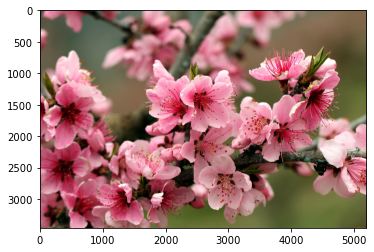

In [7]:
plt.imshow(img_arr)
plt.show()

Поскольку в данном случае мы имеем цветное изображение, параметр `cmap` указывать не нужно.

## Обработка изображений

Попробуем применить к изображению (или, что то же самое, к массиву) некоторые из известных нам операций. Например, усреднение по третьей оси (т.е. по оси цвета) дает нам черно-белое изображение.

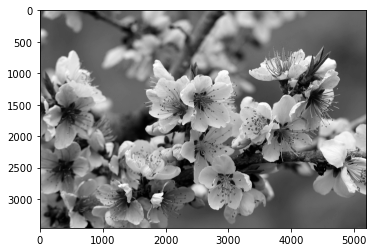

In [8]:
plt.imshow(img_arr.mean(axis=2), cmap='gray')
plt.show()

Можно визуализировать отдельно красный, зеленый и синий компоненты изображения.

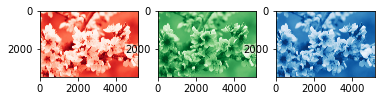

In [9]:
ax1 = plt.subplot(131)
ax1.imshow(img_arr[:, :, 0], cmap='Reds_r')
ax2 = plt.subplot(132)
ax2.imshow(img_arr[:, :, 1], cmap='Greens_r')
ax3 = plt.subplot(133)
ax3.imshow(img_arr[:, :, 2], cmap='Blues_r')
plt.show()

С помощью срезов и транспонирования можно переворачивать изображение (при транспонировании нужно правильно указать оси, чтобы цвет остался без изменений).

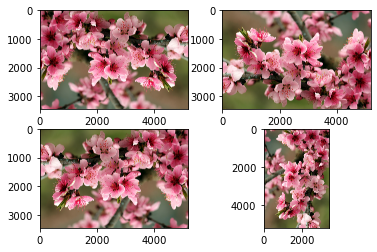

In [10]:
ax1 = plt.subplot(221)
ax1.imshow(img_arr[::-1])
ax2 = plt.subplot(222)
ax2.imshow(img_arr[:, ::-1])
ax3 = plt.subplot(223)
ax3.imshow(img_arr[::-1, ::-1])
ax3 = plt.subplot(224)
ax3.imshow(np.transpose(img_arr, (1, 0, 2)))
plt.show()

С помощью некоторых математических функций можно производить обработку изображения. Например, увеличить красный компонент (преобразования типов необходимы, чтобы не выйти за пределы допустимых значений байта и не получить некрасивые искажения).

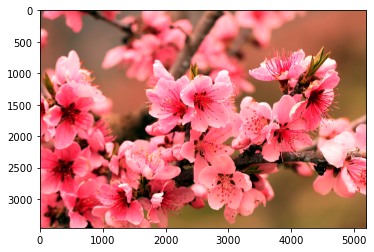

In [11]:
modified = img_arr.astype('float')
modified[:, :, 0] *= 1.5
modified[modified > 255] = 255
modified = modified.astype('uint8')
plt.imshow(modified)
plt.show()

Здесь стоит немного пояснить третью строчку. При применении к массивам логических операций мы получаем массив такого же размера, как исходный, но содержащий булевы значения.

In [12]:
a = np.array([1, 2, 3, 4])
a > 2

array([False, False,  True,  True])

С другой стороны в качестве "индекса" для среза мы можем использовать массив булевых значений, который означает, какие элементы из исходного массива войдут в срез, а какие - нет.

In [13]:
a[[True, False, True, False]]

array([1, 3])

Соединяя эти два факта вместе мы получаем очень удобный способ фильтрации массива: в качестве индекса внутри квадратных скобок пишем логическое выражение, которое будет преобразовано в массив булевых значений, которые в свою очередь будут использваны в качестве индекса. Например, выберем из массива только четные элементы:

In [14]:
a[a % 2 == 0]

array([2, 4])

Вернемся к нашему примеру. Строка `modified[modified > 255] = 255` означает, что те элементы массива, значение которых оказалось больше, чем 255 (максимальное значение в 1 байте), мы ограничиваем значением 255, чтобы избежать переполнения.

**Упражнение №2**

Поэкспериментируйте с этим примером. Попробуйте другие коэфициенты, другие компоненты цвета и другие математические операции.

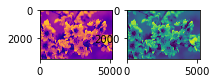

In [15]:
ax3 = plt.subplot(141)
ax3.imshow(img_arr[:, :, 2], cmap='plasma')
ax3 = plt.subplot(142)
ax3.imshow(img_arr[:, :, 2], cmap='viridis')
plt.show()

## Размытие изображения (задача)
Перед вами стоит задача написать функцию размытия изображений. Размытие изображения - частный случай операции "свертки" (или "конволюции"), которая часто применяется и в других задачах. Не вникая глубоко в математические детали, можно сказать, что суть этой операции в том, что элементы исходного массива суммируются со своими соседями с определенным весом. Для большей ясности начнем с обычного 1-мерного массива. Пусть у нас есть массив (для простоты пусть в нем будет большая часть нулей и только один ненулевой элемент в середине), и мы хотим просто усреднить каждое значение с его ближайшими соседями. Тогда массив весов будет состоять из трех единиц (чтобы исходная сумма осталась неизменной, поделим их на 3). Воспользуемся функцией `convolve1d` из библиотеки `scipy`.

In [19]:
import scipy
import scipy.ndimage

In [20]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/3, 1/3, 1/3])
scipy.ndimage.convolve1d(a, w)

array([0.        , 3.33333333, 3.33333333, 3.33333333, 0.        ])

Попробуем взять другой массив весов. Например, пусть исходное значение входит в среднее с несколько большим весом, чем его соседи.

In [21]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/4, 1/2, 1/4])
scipy.ndimage.convolve1d(a, w)

array([0. , 2.5, 5. , 2.5, 0. ])

Можно сделать свертку и большего размера.

In [22]:
a = np.array([0, 0, 0, 10, 0, 0, 0], dtype=float)
w = np.array([1/12, 1/6, 1/2, 1/6, 1/12])
scipy.ndimage.convolve1d(a, w)

array([0.        , 0.83333333, 1.66666667, 5.        , 1.66666667,
       0.83333333, 0.        ])

In [23]:
Аналогично делаются и двумерные свёртки.

SyntaxError: invalid syntax (4223346764.py, line 1)

In [24]:
a = np.zeros((5, 5))
a[2, 2] = 10
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [25]:
w = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=float)
w /= w.sum()
scipy.ndimage.convolve(a, w)

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.625, 1.25 , 0.625, 0.   ],
       [0.   , 1.25 , 2.5  , 1.25 , 0.   ],
       [0.   , 0.625, 1.25 , 0.625, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

**Упражнение №3**

Напишите функцию размытия изображения с заданной весовой матрицей. При этом не забудьте учесть следующие детали:
1. Функция должна корректно работать как с цветными, так и с черно-белыми изображениями.
2. Весовая матрица, возможно, нуждается в нормировке.
3. В итоговом изображении не должно быть переполнения однобайтного типа.

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# создадим функцию, которая создаёт "рамку" из 0 вокруг исходного изображения
def frame(im, wm):
    x = len(wm[0])//2 #число "лишних" пикселей в весовой матрице с одного края
    f = [0]*(2*x+len(im.T[0])) 
    for i in range (len(f)):
        f[i] = [0]*(len(im[0])+2*x) #создали массив из нулей с боковыми границами по х с каждой стороны, необходимыми для наложения матрицы размытия
    f = np.array(f)
    for i in range (len(f.T[0])):
        for j in range (len(f[0])):
            if (i<x) or (j<x) or (i>len(f.T[0])-x-1) or (j>len(f[0])-x-1): #элементы "рамки" заполняем нулями
                f[i][j] = 0
            else:
                f[i][j] = im[i-x][j-x] #остальные элементы заполняем как в изображении (но их индексы передвигаются)
    return f

a = np.zeros((5, 2))
a[0, 0] = 1
w = np.array ([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
print (a)
print (w)
print (frame(a, w))

def blur(img_array, weights_array):
    """
    Вычисляет свертку изображения и нормированной весовой матрицы.
    """
    img_array = frame(img_array, weights_array)
    x = len( weights_array[0])//2 
    t = [0]*len(img_array.T[0])
    for i in range (len(t)):
        t[i] = [0]*len(img_array[0])  
    for i in range (1, len(img_array.T[0])-len(weights_array)+1): #строки
        for j in range (1, len(img_array[0])-len(weights_array)+1): #столбцы
            for i1 in range(len(weights_array.T[0])): #строки weights_array
                for j1 in range(len(weights_array[0])): #столбцы weights_array
                    t[i][j] = t[i][j] + weights_array[i1][j1]*img_array[i+i1][j+j1]
    return (t)  


[[1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


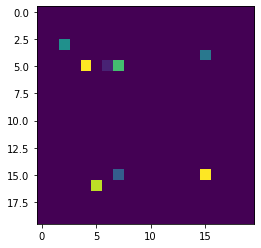

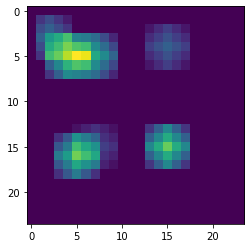

In [146]:
a = np.zeros((20, 20)) 
a[5, 4] = 10
a[3, 2] = 5
a[5, 7] = 7
a[15, 7] = 3
a[5, 6] = 1
a[16, 5] = 9
a[4, 15] = 4
a[15,15] = 10

#нормируем матрицу размытия 5*5
w = np.array([[1, 2, 3, 2, 1], [2, 3, 4, 3, 2], [3, 4, 5, 4, 3], [2, 3, 4, 3, 2], [1, 2, 3, 2, 1]])
s = np.sum(w)
w1 = w/s

plt.imshow(a)
plt.show()
 
plt.imshow(blur(a, w1))
plt.show()

**Упражнение №4**

Напишите функцию гауссова размытия. Функция принимает на вход дисперсию размытия (сигму), генерирует весовую матрицу и вызывает функцию из предыдущего задания.

Функция гауссова распределения (нормировочный множитель можно опустить, поскольку матрица в любом случае будет нормироваться потом):

$$
f(x) = e^{-\frac{1}{2}(\frac{x}{\sigma})^2}
$$
где `x` - расстояние до центра.

Подумайте, какого размера должна быть весовая матрица.

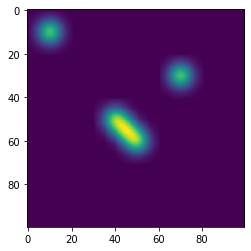

In [107]:
import math as m
def gaussian_blur(img_array, sigma):
    """
    Выполняет гауссово размытие с заданной дисперсией
    """
    n = round(5*sigma)
    wm = np.zeros((n, n))
    u = round(n)//2
    for i in range(n):
        for j in range(n):
            wm[i][j] = m.exp(-1*((i-u)**2+(j-u)**2) / (2*sigma**2))
    t = blur(img_array, wm)
    return(t)

a = np.zeros((80, 80))
a[10,10]=8
a[50,40]=8
a[55,45]=8
a[60,50]=8
a[30,70]=8
plt.imshow(gaussian_blur(a, 4))
plt.show()

## Генерирование изображений

В первом примере мы уже видели, как сгенерировать простой градиент. Давайте попробуем что-нибудь посложнее.

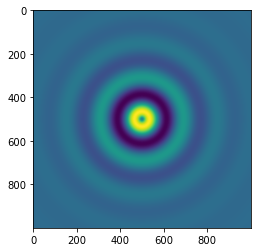

In [108]:
x = np.linspace(-20, 20, 1000)
y = x[::-1].reshape((-1, 1))
dist = np.sqrt(x ** 2 + y ** 2)
img = np.sin(dist) * np.exp(-dist * 0.2)
plt.imshow(img)
plt.show()

Здесь в переменной `x` мы создали линейную последовательность точек по оси x, в переменной `y` - эту же последовательность, но расположенную вертикально (реверс сделан, чтобы ось y была направлена как обычно снизу вверх - строки в массивах нумеруются сверху вниз). Сложение двух массивов, один из которых представляет собой строку, а другой - столбец, дает матрицу попарных сумм их элементов.

In [41]:
a = np.array([1, 2, 3])
b = np.array([[10],
              [20],
              [30]])
a + b

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

С помощью этого приема легко одной операцией посчитать функцию двух переменных на некотором участке пространства. В данном случае мы посчитали затухающий синус.

**Упражнение №5**
Изобразите функцию на диапазоне \[-3, 3]
$$
f(x, y) = x^2 + (y + 1 - \sqrt{|x|})^2 - 1
$$

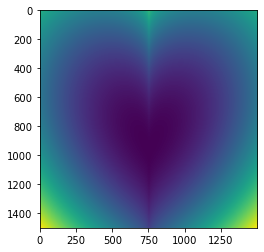

In [147]:
x = np.linspace(-3, 3, 1500)
y = x[::-1].reshape((-1, 1))
a = x**2+(y + 1 - np.sqrt(abs(x)))**2-1
plt.imshow(a)
plt.show()

Напоследок сделаем что-нибудь по-настоящему красивое. Например, множество Мандельброта. Напомним, что это множество точек `c` на комплексной плоскости такое, что последовательность
$$
z_{n} = z_{n-1}^2 + c
$$
задает ограниченную последовательность.

На практике можно вычислить несколько итераций (скажем, 100), и если значение всё ещё меньше 2, можно считать, что в этой точке последовательность ограничена.

Для начала создадим комплексную плоскость.

In [110]:
re = np.linspace(-2, 2, 200)
im = np.linspace(-2, 2, 200).reshape((-1, 1))
c = re + im * 1j

Теперь посчитаем последовательность. Можете не обращать внимания на предупреждение о переполнении - в некоторых точках последовательность уже ушла в бесконечность.

In [112]:
z = np.zeros((200, 200))
for i in range(100):
    z = z ** 2 + c

C:\Users\User95\AppData\Local\Temp\ipykernel_11892\3000746105.py:3: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\User95\AppData\Local\Temp\ipykernel_11892\3000746105.py:3: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


Наконец, изобразим получившееся множество.

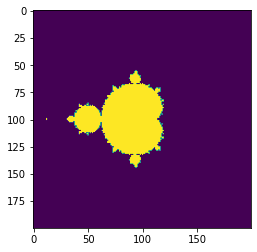

In [148]:
img = np.zeros((200, 200))
img[np.abs(z) < 2] = 255
plt.imshow(img)
plt.show()

**Упражнение №6**
Добавьте в это изображение оттенки в соответствии с тем, насколько быстро последовательность расходится в данной точке. Напишите функцию, в которой можно задать диапазон и количество точек ("качество" изображения).

C:\Users\User95\AppData\Local\Temp\ipykernel_11892\47840412.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(z.astype('uint8'))


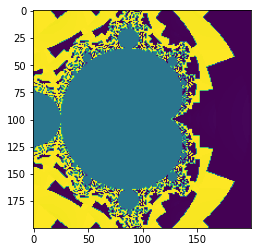

In [149]:
def mandelbrot(x_low, x_high, y_low, y_high, points_x, points_y):
    """
    Создает изображение множества Мандельброта в диапазоне по x от x_low до x_high,
    по y - от y_low до y_high с разрешением points_x*points_y
    """
    
    re = np.linspace(x_low, x_high, points_x)
    im = np.linspace(y_low, y_high, points_y).reshape((-1, 1))
    c = re + im * 1j
    z = np.zeros((points_x, points_y), dtype='complex')
    
    for i in range(points_x):
        for j in range(points_y):
            for x in range(1000):
                z[i][j] = z[i][j]**2 + c[i][j]
                if abs(z[i][j]) >= 2:
                    z[i][j] -= 1
                    break
            else:
                z[i][j] = 100
    plt.imshow(z.astype('uint8'))
    plt.show()

mandelbrot(-1, 1, -1, 1, 200, 200)


**Упражнение №7 (дополнительное)**

Изобразите [множество Жюлиа](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%96%D1%8E%D0%BB%D0%B8%D0%B0).